### Idea

Create a Markov Chain to analyze how different types of students are led to the different paths. The feature space will be a reduced space clustered with spectral clustering

#### Import libraries

In [1]:
# Input
# from db import PythonProblems
import io

#DB
from questions.models import Solution, Cluster

# Helpers
import numpy as np
import pickle

# Preprocessing
import tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD, NMF

# Distance
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances, pairwise_kernels

# Learning
from clustering import Clustering
from questions.sampling import get_next_sample

# Visualization
from plot2d import Plot2D
import matplotlib.pyplot as plt
import seaborn as sns
from generate_pdf import PDFReport


%matplotlib inline

In [3]:
## Cleaning database
last_id = 132
problems = Problem.objects.filter(id__gt=132)
solutions_obj = Solution.objects.filter(problem__in=problems).update(ignore=True)
print(problems.count())
problems = Problem.objects.filter(id__lte=132)
problems.count()

591


132

In [4]:
solutions_obj = Solution.objects.filter(problem__in=problems, ignore=False).order_by('id')

In [5]:
solutions_obj.count()

54

In [6]:
vocabulary = []
for sol in solutions_obj:
    file = io.StringIO(sol.content)
    print(sol.content)
    for item in tokenize.generate_tokens(file.readline):
#     print(list(tokenize.generate_tokens(file.readline)))
        print("%s %s" % (tokenize.tok_name[item[0]], item[1]))
        vocabulary.append(item[1])

def list_ends(a_list):
    return [a_list[0], a_list[len(a_list)-1]]
NAME def
NAME list_ends
OP (
NAME a_list
OP )
OP :
NEWLINE 

INDENT     
NAME return
OP [
NAME a_list
OP [
NUMBER 0
OP ]
OP ,
NAME a_list
OP [
NAME len
OP (
NAME a_list
OP )
OP -
NUMBER 1
OP ]
OP ]
DEDENT 
ENDMARKER 
def reverseWord(w):
  return ' '.join(w.split()[::-1])
NAME def
NAME reverseWord
OP (
NAME w
OP )
OP :
NEWLINE 

INDENT   
NAME return
STRING ' '
OP .
NAME join
OP (
NAME w
OP .
NAME split
OP (
OP )
OP [
OP :
OP :
OP -
NUMBER 1
OP ]
OP )
DEDENT 
ENDMARKER 
def max_of_three(a,b,c):
     max_3=0
     if a>b:
         #max_3=a
         if a>c:
             max_3=a
         else:
             max_3=c
     else:
          if b>c:
             max_3=b
          else:
             max_3=c
     return max_3
NAME def
NAME max_of_three
OP (
NAME a
OP ,
NAME b
OP ,
NAME c
OP )
OP :
NEWLINE 

INDENT      
NAME max_3
OP =
NUMBER 0
NEWLINE 

NAME if
NAME a
OP >
NAME b
OP :
NEWLINE 

COMMENT #max_3=a
NL 

INDENT        


INDENT             
NAME hexSeg
OP =
NUMBER 11
NEWLINE 

DEDENT 
NAME elif
NAME hexSeg
OP ==
STRING 'C'
OP :
NEWLINE 

INDENT             
NAME hexSeg
OP =
NUMBER 12
NEWLINE 

DEDENT 
NAME elif
NAME hexSeg
OP ==
STRING 'D'
OP :
NEWLINE 

INDENT             
NAME hexSeg
OP =
NUMBER 13
NEWLINE 

DEDENT 
NAME elif
NAME hexSeg
OP ==
STRING 'E'
OP :
NEWLINE 

INDENT             
NAME hexSeg
OP =
NUMBER 14
NEWLINE 

DEDENT 
NAME elif
NAME hexSeg
OP ==
STRING 'F'
OP :
NEWLINE 

INDENT             
NAME hexSeg
OP =
NUMBER 15
NEWLINE 

DEDENT 
NAME else
OP :
NEWLINE 

INDENT             
NAME hexSeg
OP =
NAME int
OP (
NAME hexSeg
OP )
NEWLINE 

NL 

COMMENT #work out the place value power of 16
NL 

DEDENT 
NAME placePower
OP =
NUMBER 16
OP **
OP (
NAME lengthHex
OP -
OP (
NAME element
OP +
NUMBER 1
OP )
OP )
NEWLINE 

NAME hexSeg
OP =
NAME hexSeg
OP *
NAME placePower
NEWLINE 

NAME denary
OP =
NAME denary
OP +
NAME hexSeg
NEWLINE 

NL 

DEDENT 
NAME return
NAME denary
DEDENT 
ENDMARKER 
def s

In [7]:
set(vocabulary)

{'',
 '\t',
 '\n',
 '\r\n',
 '  ',
 '    ',
 '     ',
 '      ',
 '        ',
 '         ',
 '          ',
 '            ',
 '             ',
 '                ',
 '!=',
 '" "',
 '" You can retire in {0} years."',
 '""',
 '"%s"',
 '", "',
 '","',
 '"0"',
 '"00000000"',
 '"1"',
 '"Both Team One and Team Two score 1 point."',
 '"Character not found."',
 '"D"',
 '"DOWN"',
 '"LEFT"',
 '"RIGHT"',
 '"Team One scores 3 points and Team Two scores 0 points."',
 '"Team Two scores 3 points and Team One scores 0 points."',
 '"UP"',
 '"W"',
 '"You are old enough to vote."',
 '"You can vote in {0} years."',
 '"[$#@]"',
 '"[0-9]"',
 '"[A-Z]"',
 '"[a-z]"',
 '"\\s"',
 '"autumn"',
 '"digits"',
 '"letters"',
 '"lowercase"',
 '"spring"',
 '"summer"',
 '"uppercase"',
 '"winter"',
 '"{0}"',
 '"{0}{1}"',
 '"{0}{1}{2}"',
 '"{0}{1}{2}{3}"',
 '#',
 '# Complete your function using this header',
 '# So it works using eval',
 "# don't forget to initialise the running total before you start",
 '# frequency of words

In [8]:
# removed_itens = ['NEWLINE', 'ENDMARKER', "NL", 'COMMENT', 'ERRORTOKEN']
# allowed_itens = ['NAME', 'OP', 'INDENT', 'DEDENT', 'STRING', 'NUMBER']
# cursor = db.conn.cursor()
# docs = []
docs_id = []
# doc_category = []
# errors = []
questions = []
solutions = []

# lendo os dados
# cursor.execute("""
# SELECT solution.id, solution.content, problem.content, problem.category FROM solution, problem where solution.problem_id = problem.id;
# """)

for sol in solutions_obj:
#     file = io.StringIO(sol.content)
#     doc = []
#     try:
#         for item in tokenize.generate_tokens(file.readline):
            
#             if tokenize.tok_name[item[0]] not in removed_itens:
#                 if tokenize.tok_name[item[0]] in allowed_itens:
#                     doc.append(item[1])
#                 else:
#                     print("%s %s" % (tokenize.tok_name[item[0]], item[1]))
#     except (IndentationError, tokenize.TokenError):
#         errors.append("Please, fix solution %d before continuing" % (sol.id))
    
#     if doc == []:
#         continue
#     docs.append(' '.join(doc))
    docs_id.append(sol.id)
#     doc_category.append(row[-1])
    questions.append(sol.problem.content)
    solutions.append(sol.content)

print("Got %d documents" %(solutions_obj.count()))

# if not errors:
#     print("Success in parsing all documents! You may go on!")
# else:
#     for item in errors:
#         print(item)

Got 54 documents


***Limitações do parser:***

***1. Variável e nome reservado são do mesmo tipo. Não consigo separar sem fazer uma pré-lista. Mas pode ser o critério para ajustar o CountVectorizer***

***2. Não é possível processar solução sintaticamente errada. Talvez uma tokenização básica possa ajudar quando esse for o caso e já é uma indicação de que está errado.***

### Preprocessing solutions into bag of words ###

In [9]:
vectorizer_params = {
    "ngram_range": (1,3)
}

removed_itens = ['NEWLINE', 'ENDMARKER', "NL", 'COMMENT', 'ERRORTOKEN']
allowed_itens = ['NAME', 'OP', 'INDENT', 'DEDENT', 'STRING', 'NUMBER']

def python_analyzer(doc):
    words = []
    not_found = []
    vectorizer = CountVectorizer(**vectorizer_params)
    file = io.StringIO(doc)
    for token in tokenize.generate_tokens(file.readline):
        token_type = tokenize.tok_name[token[0]]
        
        # Redundant conditional to make sure we're getting all the token types
        if token_type not in removed_itens:
            if token_type in allowed_itens:
                # If it's a variable or reserved name, keep it
                if token_type == "NAME":
                    words.append(token[1])
                elif token_type == "INDENT":
                    # Adding indent for all indentations
                    words.append("is_indent")
                elif token_type == "DEDENT":
                    # Adding dedent for all indentations
                    words.append("is_dedent")
                elif token_type == "STRING":
                    # Adding is_string for every string
                    words.append("is_string")
                elif token_type == "NUMBER":
                    # Adding is_number for every number:
                    words.append("is_number")
                elif token_type == "OP":
                    # If it's operator, then we'll divide in several types
                    lookup = {
                        "+": "is_op_arit",
                        "+=": "is_op_arit",
                        "-": "is_op_arit",
                        "*": "is_op_arit",
                        "**": "is_op_arit",
                        "/": "is_op_arit",
                        "//": "is_op_arit",
                        "%": "is_op_arit",
                        ">": "is_op_logic",
                        "<": "is_op_logic",
                        ">=": "is_op_logic",
                        "<=": "is_op_logic",
                        "==": "is_op_logic",
                        "-=": "is_op_logic",
                        "!=": "is_op_logic",
                        "[": "is_list",
#                         "]": "is_list",
                        "{": "is_dict",
#                         "}": "is_dict",
                        ".": "is_class",
                        "=": "is_attribution",
                        ":": "is_block"
                    }
                    try:
                        words.append(lookup[token[1]])
                    except KeyError:
                        not_found.append(token[1])
#     print("not found: %s" % set(not_found))
    return vectorizer._word_ngrams(words)

In [10]:
# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = TfidfVectorizer(analyzer = python_analyzer,
#                              tokenizer = None, 
#                              preprocessor = None,
#                              stop_words = None,
#                              stop_words = ['def'],   \
                             #max_features = 26d,
                             binary=False,
                             min_df=0.2) 
analyzer = vectorizer.build_analyzer()
    
# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.

train_data_features = vectorizer.fit_transform(solutions)

# Numpy arrays are easy to work with, so convert the result to an 
# array
# Document-term matrix
train_data_features = train_data_features.toarray()
train_data_features.shape

(54, 44)

In [11]:
feature_names = vectorizer.get_feature_names()
feature_names

['append',
 'def',
 'elif',
 'else',
 'else is_block',
 'else is_block is_indent',
 'for',
 'i',
 'if',
 'in',
 'in range',
 'is_attribution',
 'is_attribution is_list',
 'is_block',
 'is_block is_indent',
 'is_block is_indent if',
 'is_block is_indent return',
 'is_class',
 'is_class append',
 'is_dedent',
 'is_dedent elif',
 'is_dedent else',
 'is_dedent else is_block',
 'is_dedent is_dedent',
 'is_dedent is_dedent return',
 'is_dedent return',
 'is_indent',
 'is_indent if',
 'is_indent return',
 'is_list',
 'is_number',
 'is_number is_block',
 'is_number is_block is_indent',
 'is_number is_dedent',
 'is_number is_op_arit',
 'is_op_arit',
 'is_op_arit is_number',
 'is_op_logic',
 'is_op_logic is_number',
 'is_op_logic is_number is_block',
 'is_string',
 'range',
 'return',
 'return is_string']

In [12]:
# Remove rows containing only zeros (weird exercises)
solution_sample = train_data_features[~(train_data_features==0).all(1)]
docs_id = np.asarray(docs_id)[~(train_data_features==0).all(1)]
# doc_category = np.asarray(doc_category)[~(train_data_features==0).all(1)]
questions = np.asarray(questions)[~(train_data_features==0).all(1)]
solution_sample.shape

(54, 44)

### Reducing dimensionality

In [13]:
def get_curve_knee(x, y):
    """ Source: inding a “Kneedle” in a Haystack: Detecting Knee Points in System Behavior 
    https://raghavan.usc.edu//papers/kneedle-simplex11.pdf"""
    
    # Set baseline curve
    x_init, y_init = x[0], y[0]
    x_final, y_final = x[-1], y[-1]
    # Plot it
    plt.plot([x_init, x_final], [y_init, y_final])
    
    # Calculate line coefficients
    a = (y_final - y_init)/(x_final - x_init)
    b = y_init - a*x_init
    y_baseline_list = []
    diff = []
    for idx in range(len(x)):
        x_baseline = x[idx]
        y_baseline = a*x_baseline + b
        y_baseline_list.append(y_baseline)
        diff.append(abs(y[idx] - y_baseline))
        plt.plot([x[idx], x_baseline], [y[idx], y_baseline], c='gray')
        
    # Get optimal value
    max_diff = max(diff)
    max_diff_idx = diff.index(max_diff)
    plt.plot([x[max_diff_idx], x[max_diff_idx]], [y[max_diff_idx], y_baseline_list[max_diff_idx]], c='red')
    
    # Return optimal number of components
    return max_diff_idx+1  

Optimal number of components: 12
Explained variance: 0.91


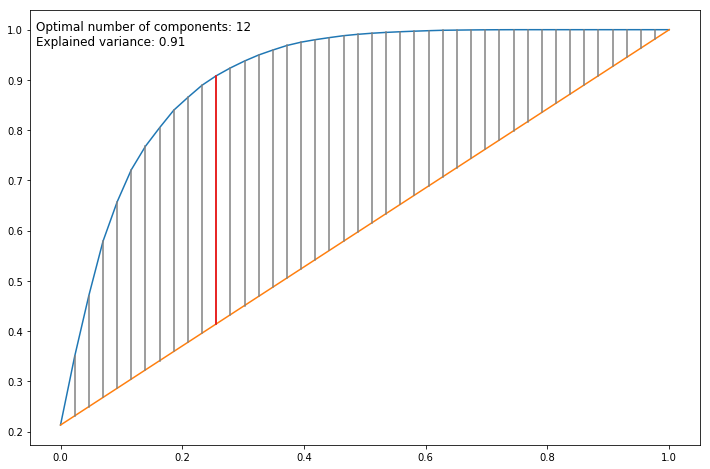

In [21]:
cum_variance = []
# for i in range(1,min(solution_sample.shape)+1):
#     solution_reduced = NMF(n_components=i)
#     solution_reduced.fit(solution_sample)
#     cum_variance.append(solution_reduced.reconstruction_err_)
    
solution_reduced = PCA(n_components=min(solution_sample.shape))
solution_reduced.fit(solution_sample)
    
# # Calculate cumulative sum of explained variance percentage
# # Normalize axis between 0 and 1 to calculate best cutoff point (curve knee)
dimensions = np.linspace(0,1,min(solution_sample.shape))
cum_variance = np.cumsum(solution_reduced.explained_variance_ratio_)
plt.figure(figsize=(12,8))
plt.plot(dimensions, cum_variance)
n_components = get_curve_knee(dimensions, cum_variance)
text = "Optimal number of components: %d\n" % n_components
text += "Explained variance: %.2f" % cum_variance[n_components-1]
# text += "Reconstruction error: %.2f" % cum_variance[n_components-1]
plt.text(-0.04, 0.97, text, fontsize=12)
print(text)
plt.show()

### Cluster solutions

In [22]:
def _generate_random_state():
    seed = np.random.randint(2**32 - 1)
    return seed
seed = _generate_random_state()
solution_reduced = PCA(n_components=n_components, random_state=seed).fit(solution_sample)
# solution_reduced = PCA(n_components=3, random_state=seed).fit(solution_sample)
solution_sample_reduced = solution_reduced.transform(solution_sample)
seed = _generate_random_state()
# document_topic = cluster.SpectralClustering(n_clusters=3, 
#                                         assign_labels="discretize").fit_predict(X)

In [64]:
solution_sample_reduced.shape

(54, 12)

In [17]:
# clustering = Clustering(handler.X, )
clustering = Clustering(solution_sample_reduced, 13)
# clustering.seed = 2209808447
#2124056991
#232156180
#2539469571
# clustering.seed = 0
# clustering._generate_random_state()
model, document_topic, word_topic = clustering.spectral_clustering()
# model, document_topic, word_topic = clustering.gaussian_mixture()
# model, document_topic, word_topic = clustering.lda()
# model, document_topic, word_topic = clustering.hierarchical()
print(clustering.seed)
clustering.plot_topic_distribution()

print("Count per class:")
clusters = clustering.document_topic.argmax(axis=1)
counts = np.unique(clusters, return_counts=True)
for i in range(clustering.k):
    print("Topic %d: %d" % ((i+1), counts[1][i]))

NameError: name 'solution_sample_reduced' is not defined

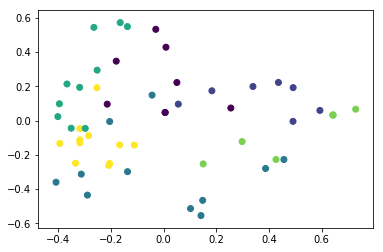

In [66]:
plt.scatter(solution_sample_reduced[:,0], solution_sample_reduced[:,1], c=clusters)

In [25]:
def print_top_words(topic_word, feature_names, n_top_words):
    for topic_idx, topic in enumerate(topic_word):
        message = "Topic #%d: " % (topic_idx+1)
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [81]:
print("\nWords per topic:")
feature_names = vectorizer.get_feature_names()
print_top_words(word_topic, feature_names, 10)


Words per topic:


TypeError: 'NoneType' object is not iterable

### Get next sample

Set initial matrices

In [67]:
# Create X as an empty belief state (X is the machine's model of the student's distribution)
X = np.zeros(clustering.document_topic.shape) # nS x nC
print(X.shape)

# Create Y as a document_topic matrix. For the first version, each document belongs to one topic
Y_col = clustering.document_topic.argmax(axis=1) # nS x nC
Y = np.zeros(clustering.document_topic.shape)
for idx in range(Y.shape[0]):
    Y[idx, Y_col[idx]] = 1

# Create W as a similarity matrix
W = cosine_similarity(clustering.X) # nS x nS
print(W.shape)

with open('similarity.pkl', 'wb') as picklefile:
    pickle.dump(W, picklefile)

# Set L as an unlabelled set
L = []

(54, 6)
(54, 54)


#### Visualization
Reduce to 2 dimensions using TSNE

3184435578


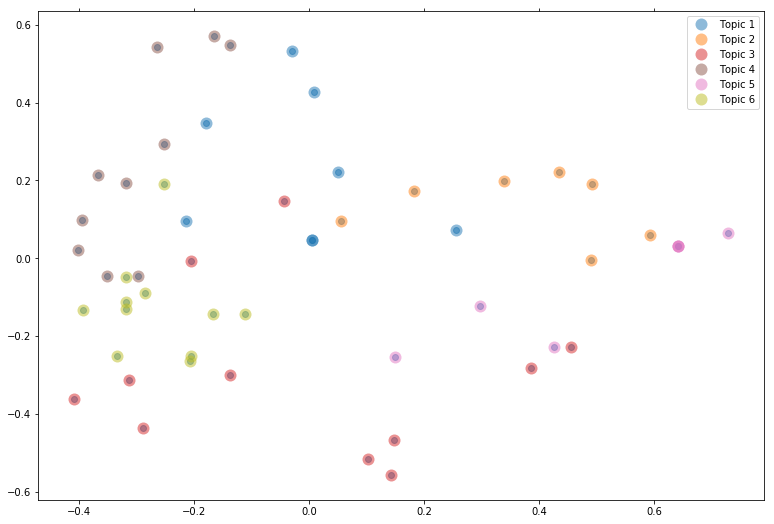

In [68]:
# %%time
# cluster_names = ['', 'conditional', 'dict', 'file', 'function', 'list', 'loop'] #'math', 'string']
cluster_names = ["Topic %d" % (i+1) for i in range(clustering.k)]
doc_category = ["Topic %d" % (i+1) for i in clustering.document_topic.argmax(axis=1)]
doc_category = ["Topic %d" % (i+1) for i in clustering.document_topic.argmax(axis=1)]
handler = Plot2D(clusters=cluster_names, doc_category=doc_category, doc_id=docs_id)
handler._generate_random_state()
# handler.seed = 14875623
handler.reduce(solution_sample_reduced)
print(handler.seed)
handler.plot(show_clusters=True)

sample = handler.X
y = clustering.document_topic.argmax(axis=1)

# fig = plt.figure(figsize=(10,5))
# plt.scatter(x=sample[:,0], y=sample[:,1], c=y, s=100)

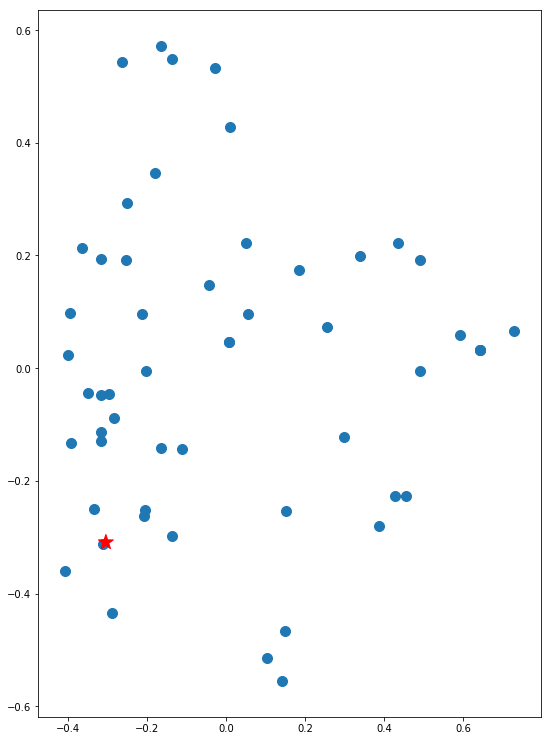

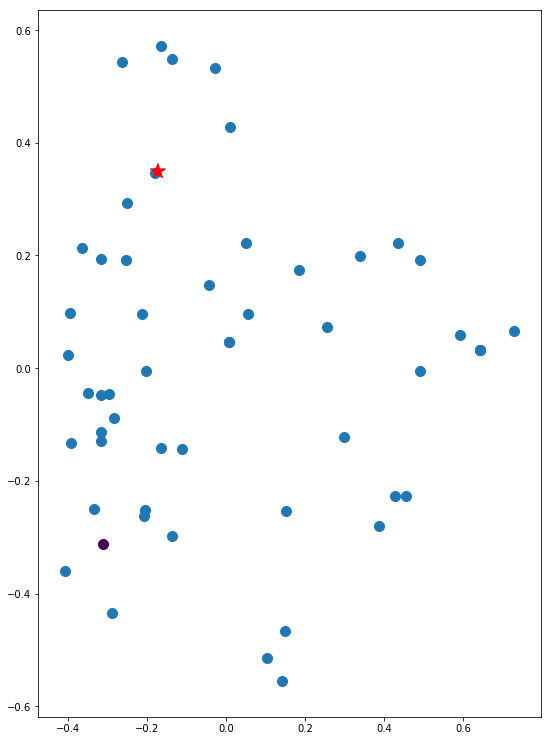

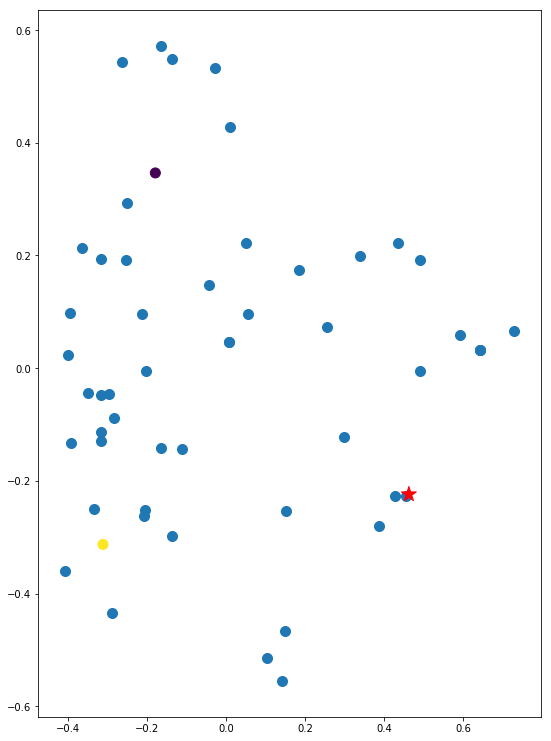

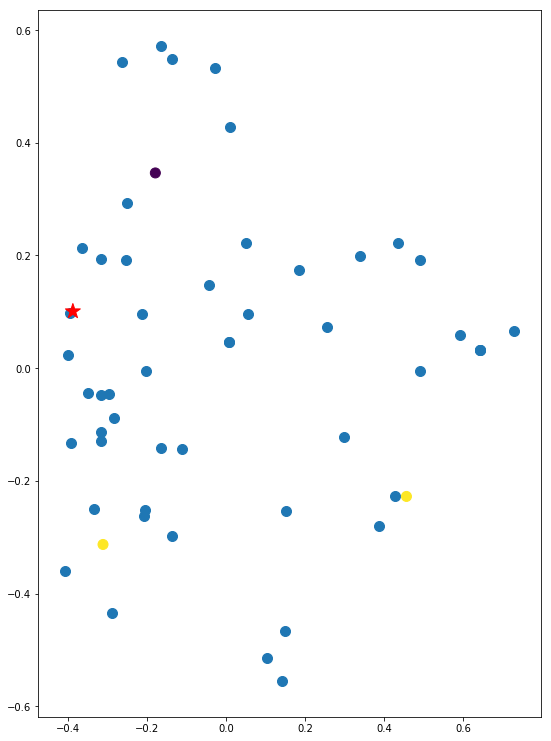

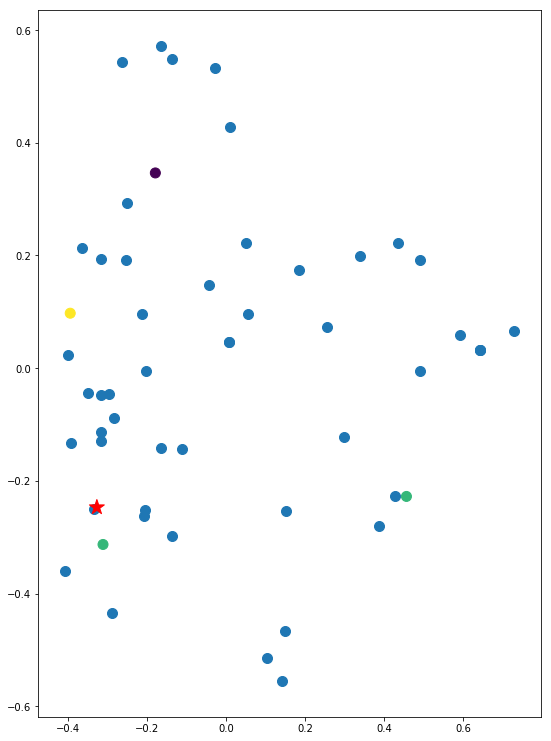

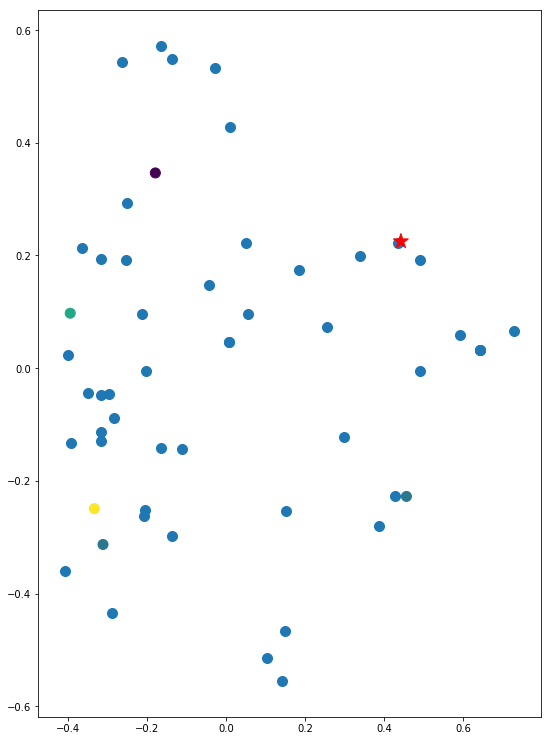

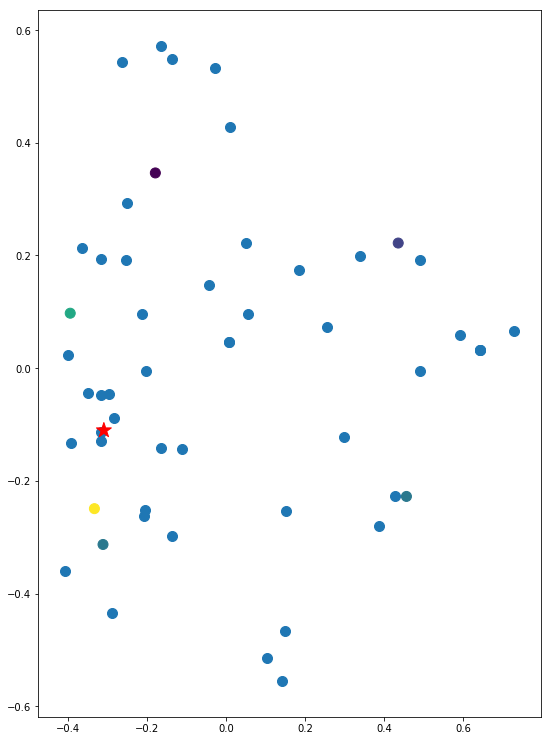

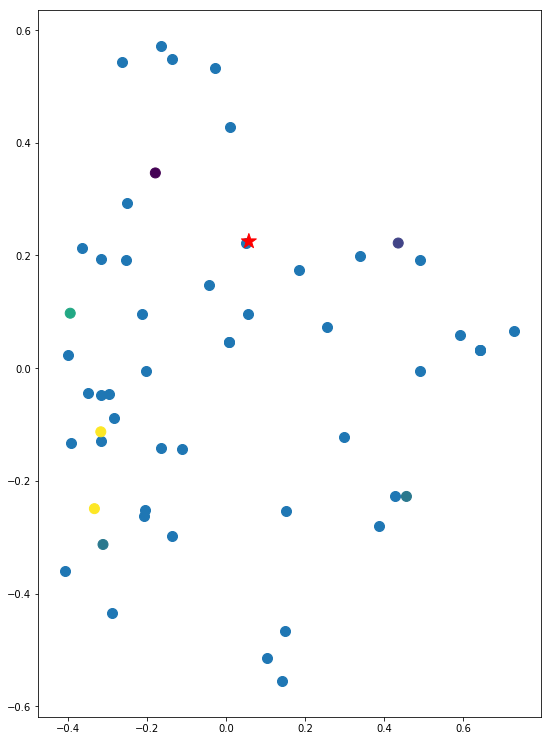

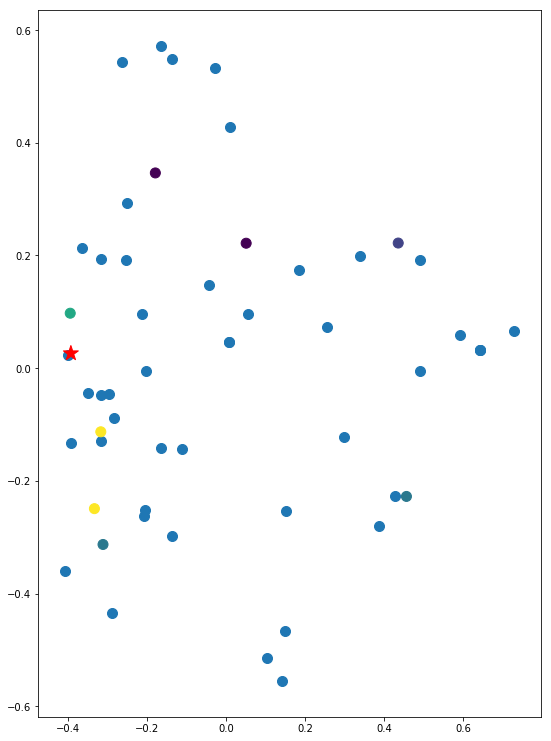

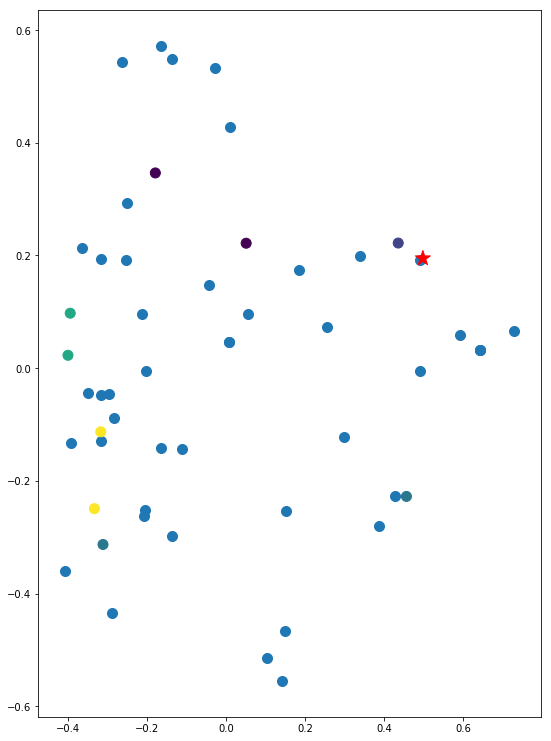

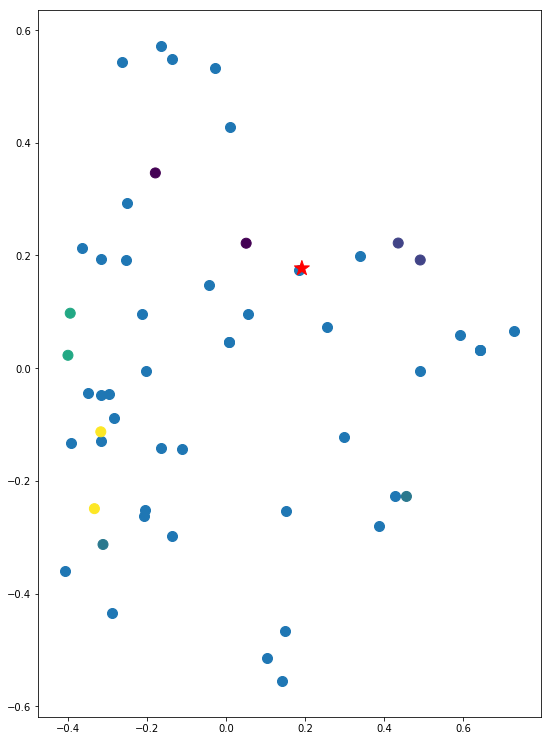

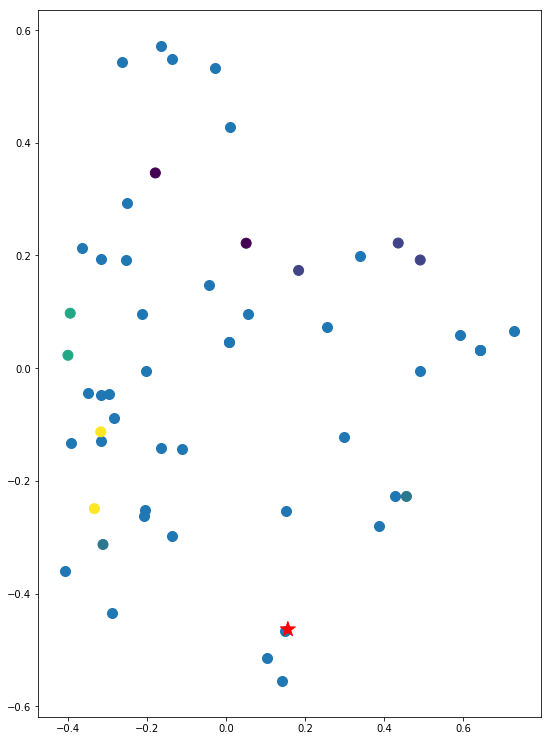

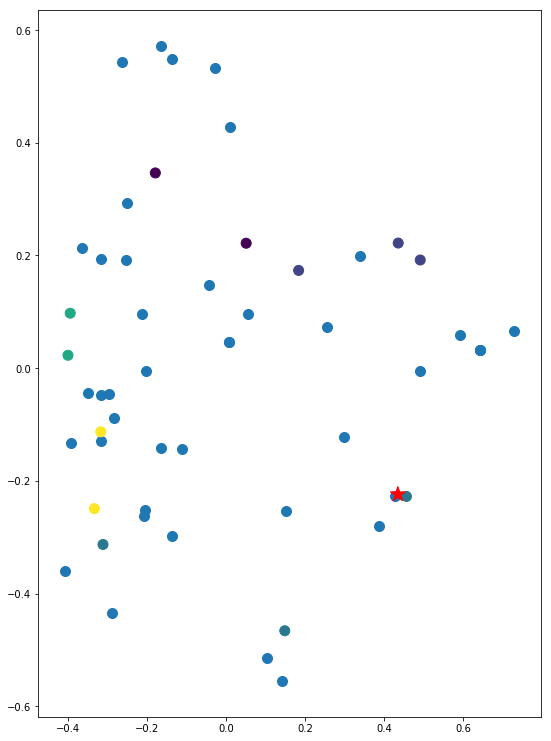

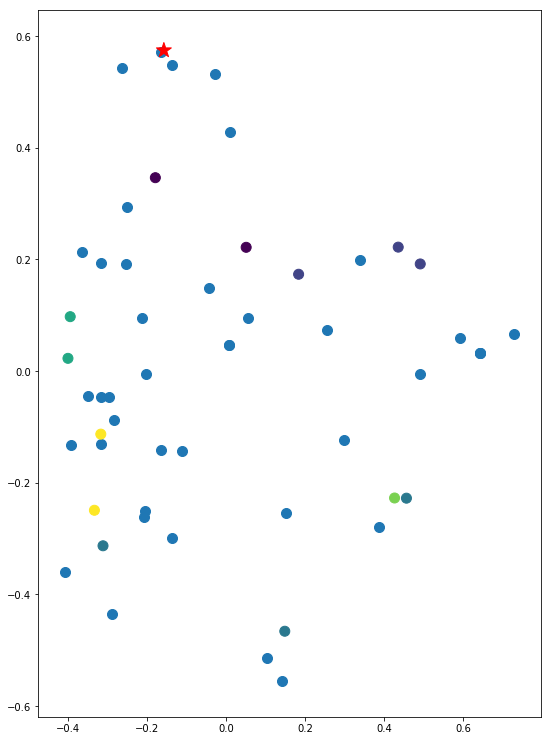

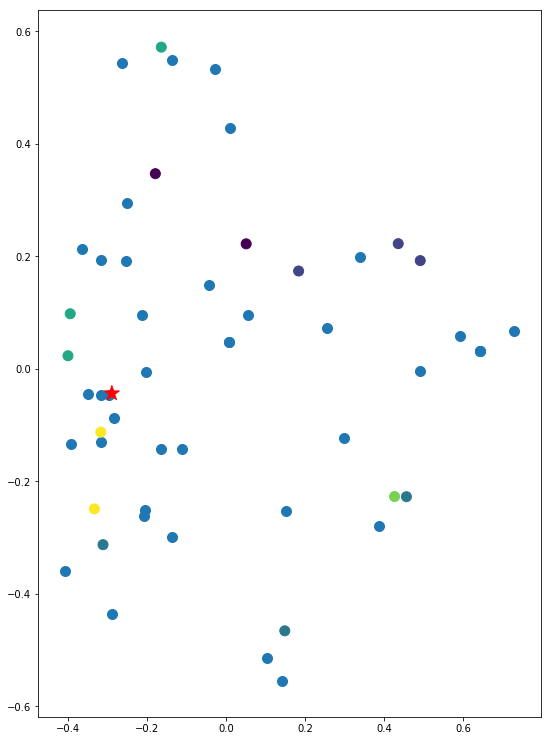

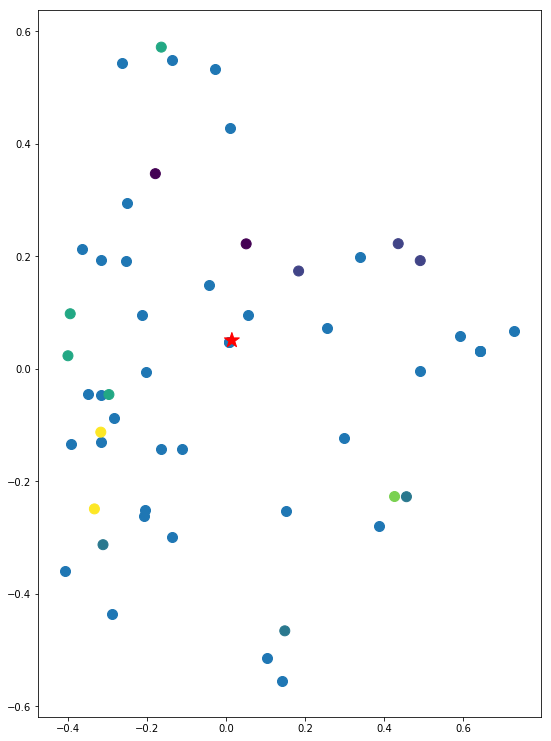

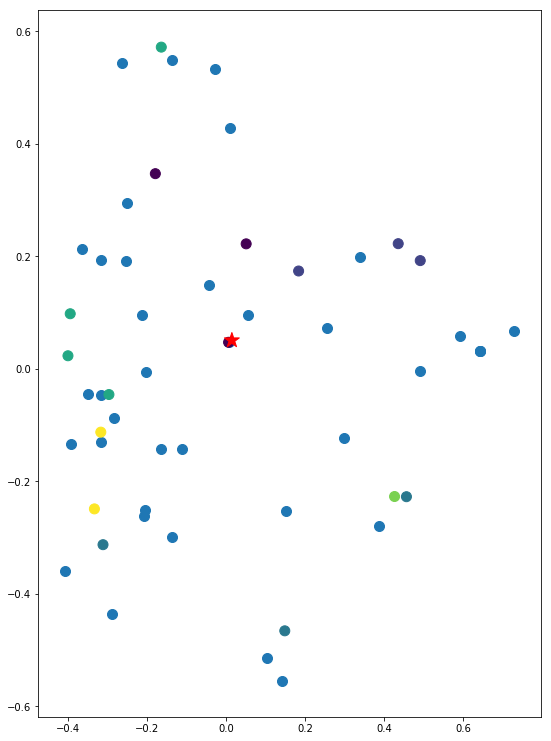

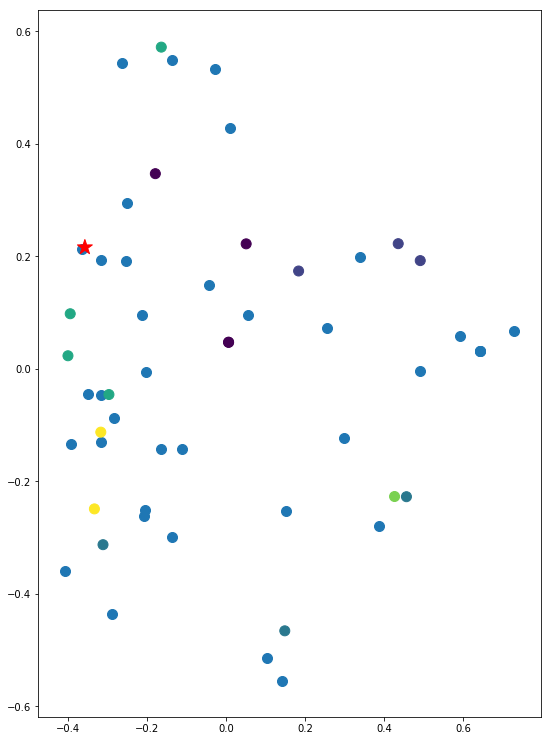

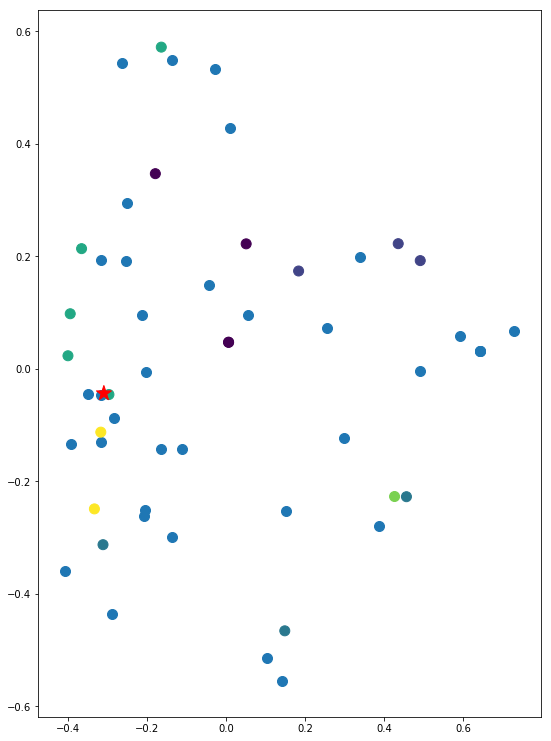

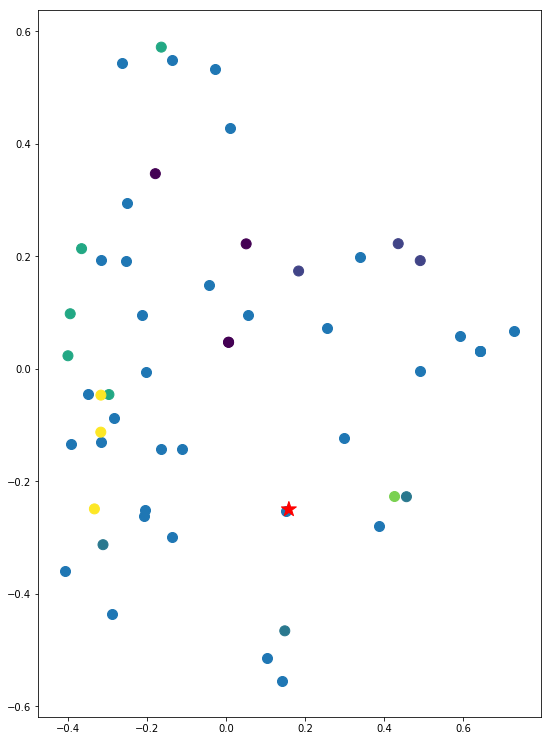

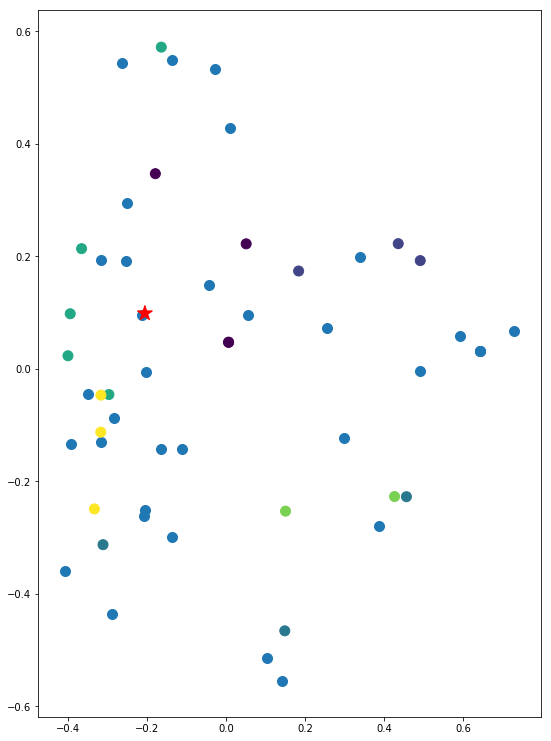

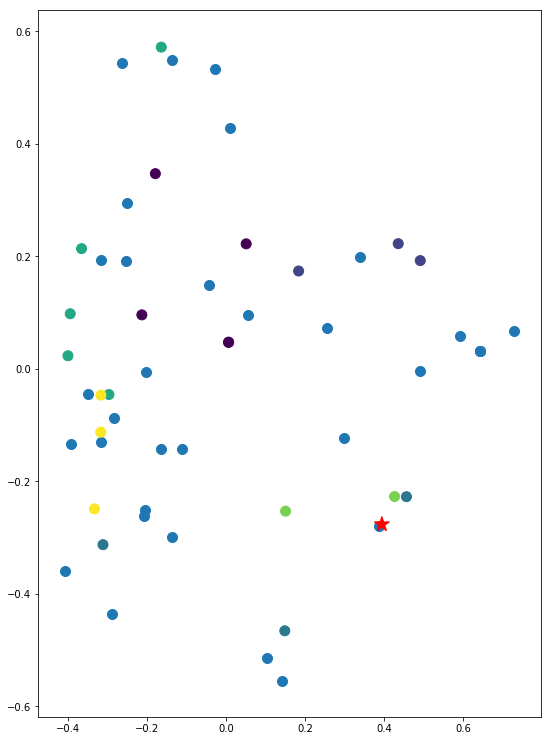

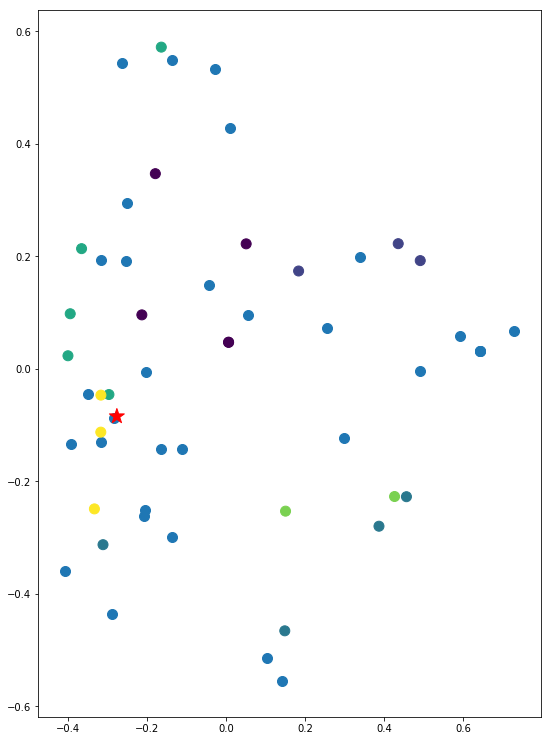

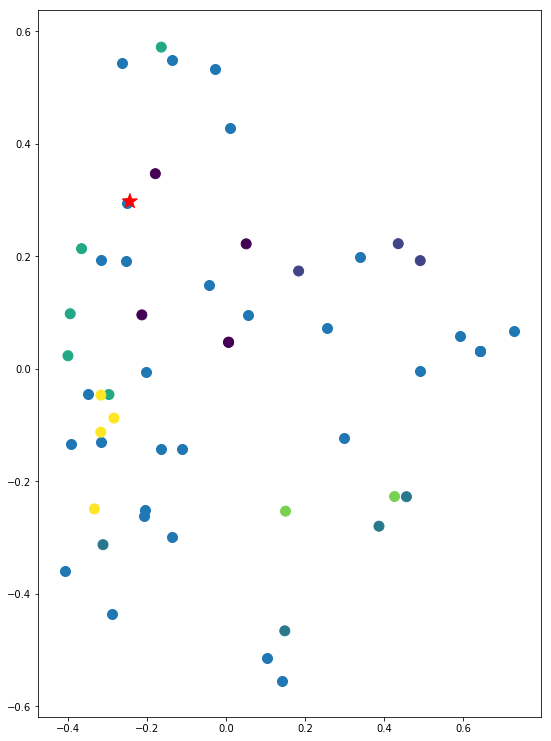

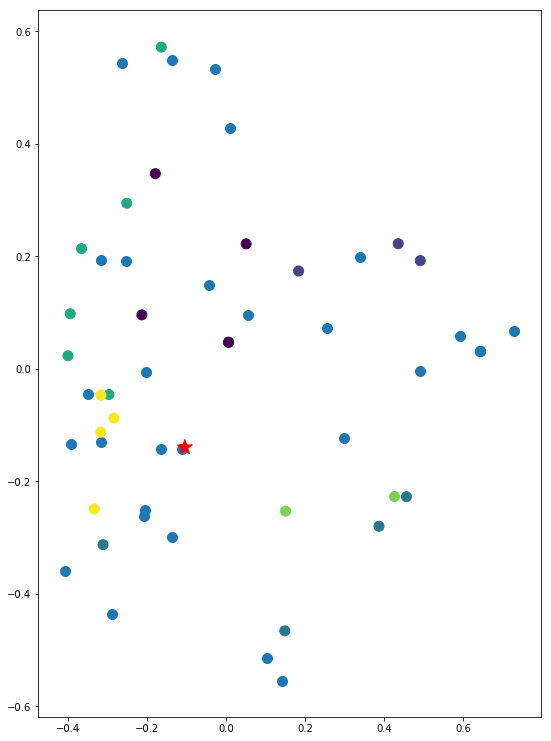

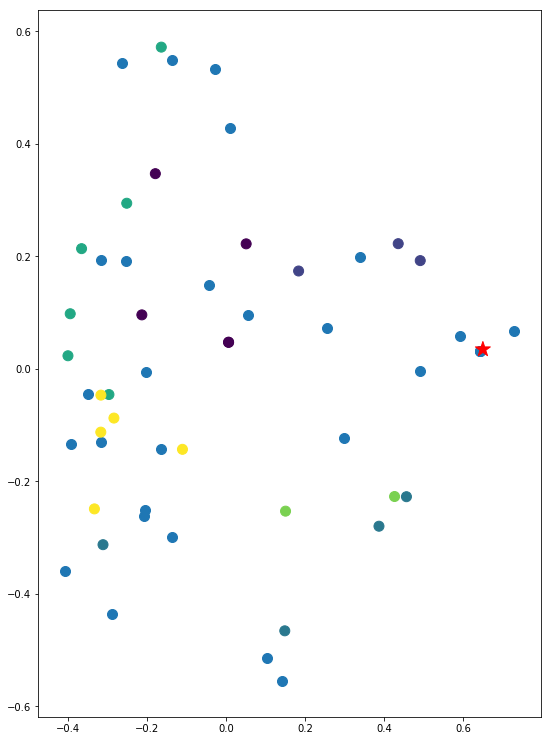

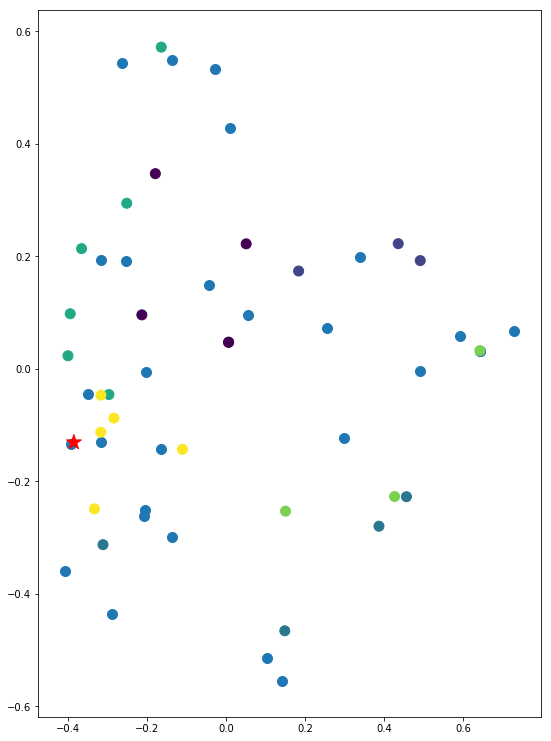

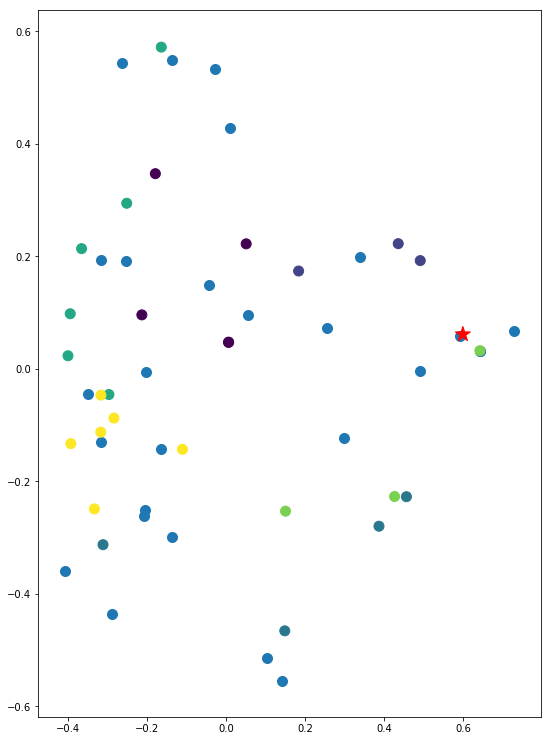

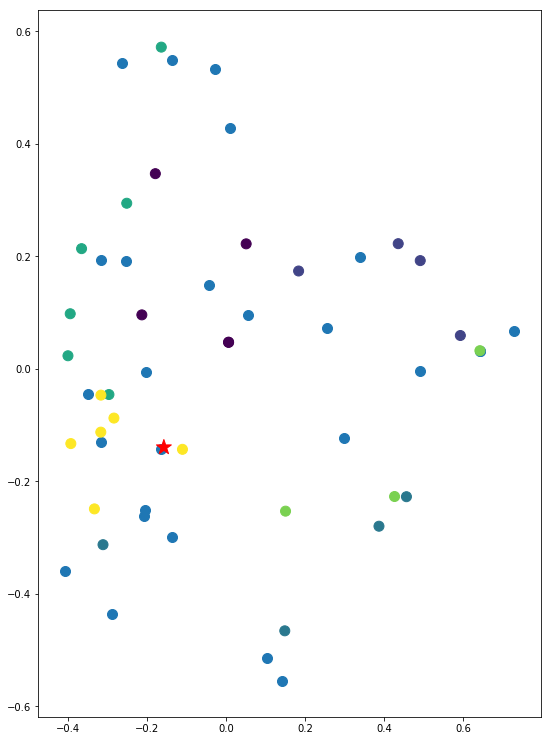

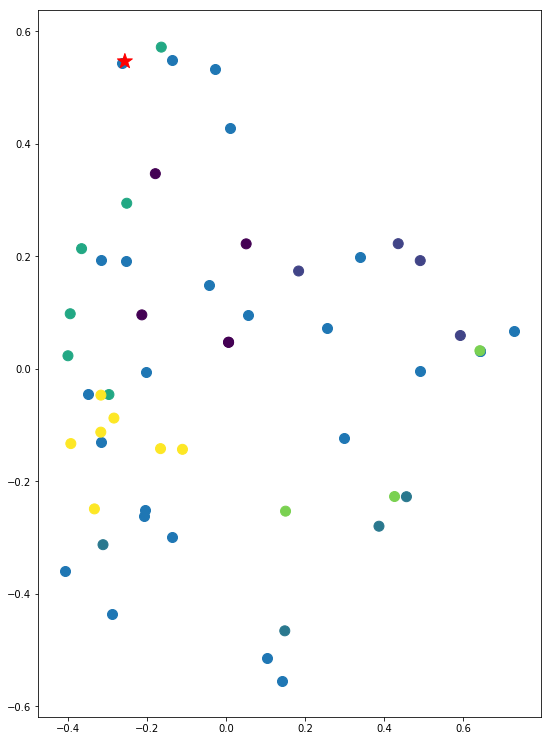

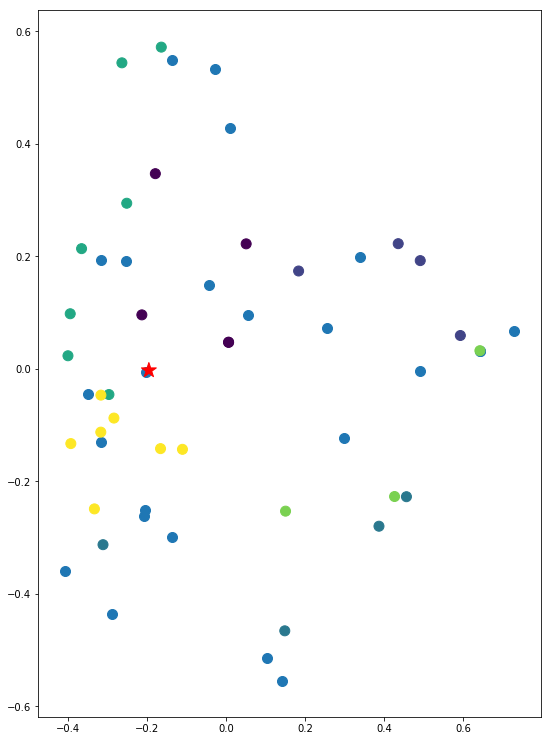

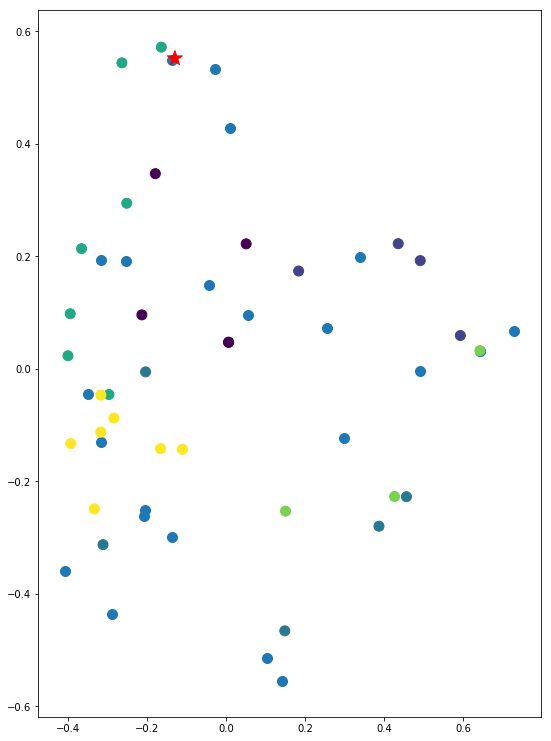

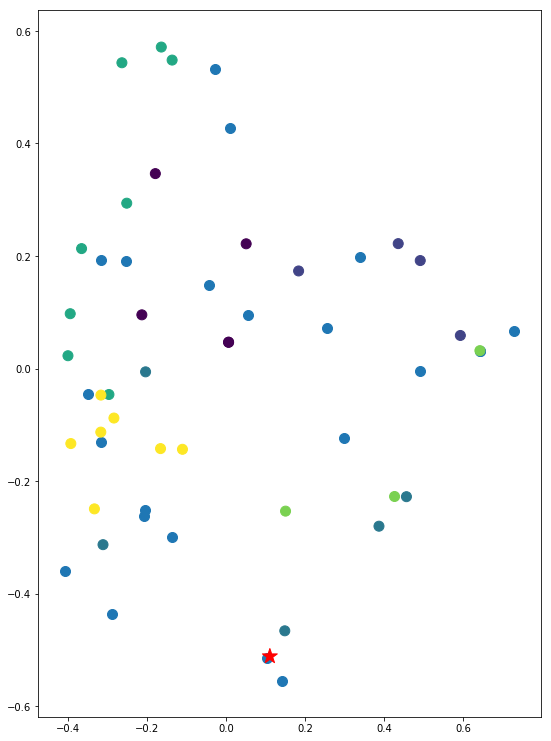

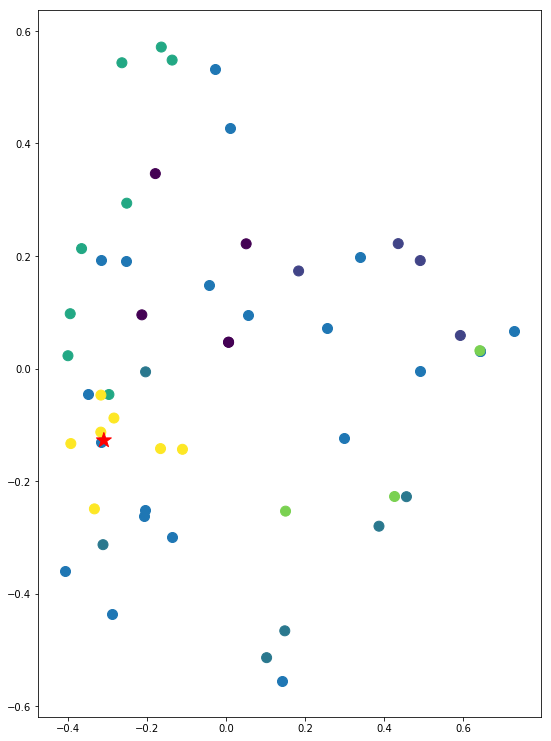

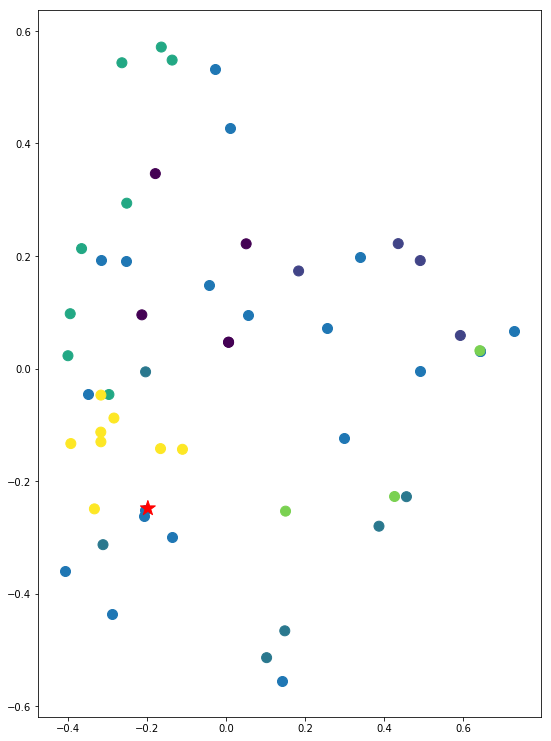

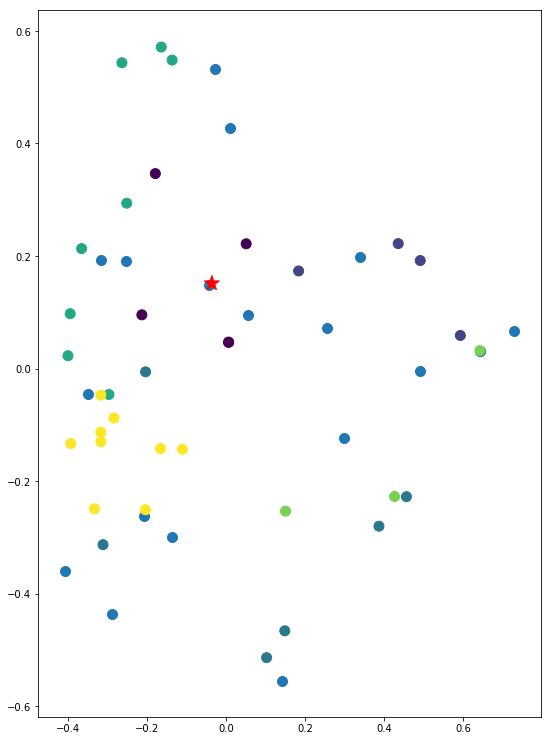

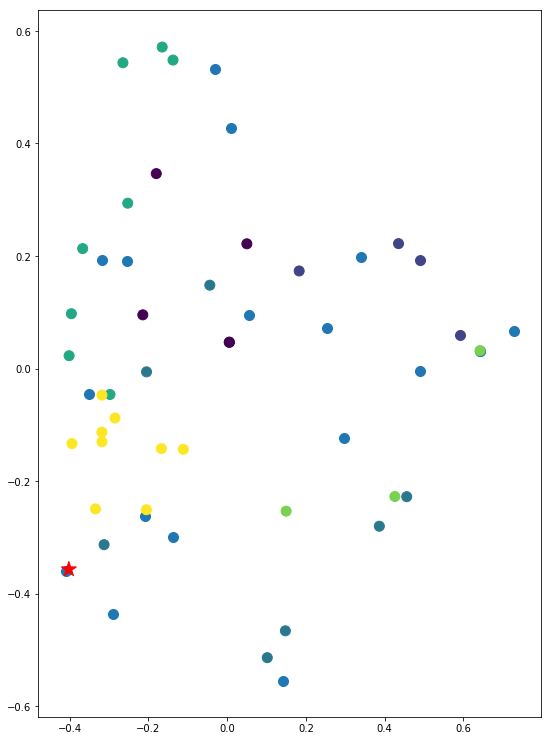

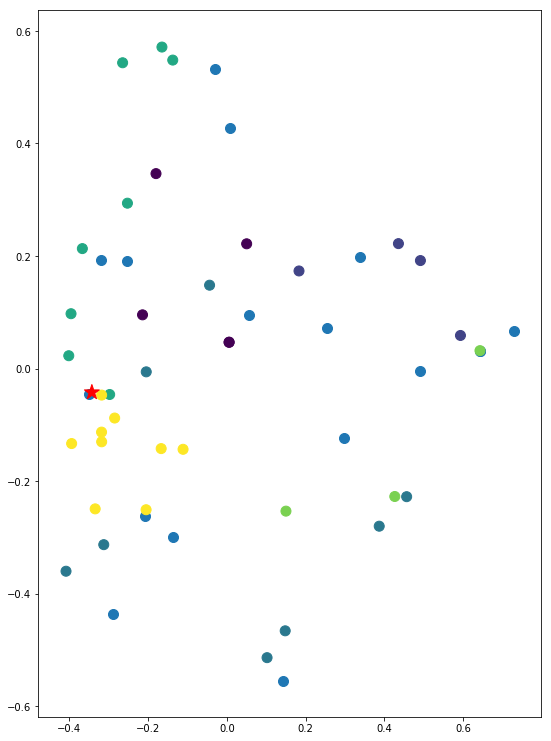

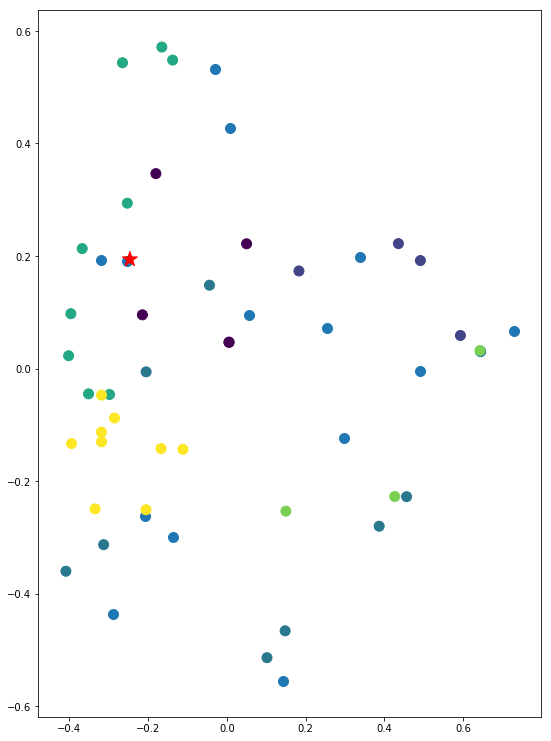

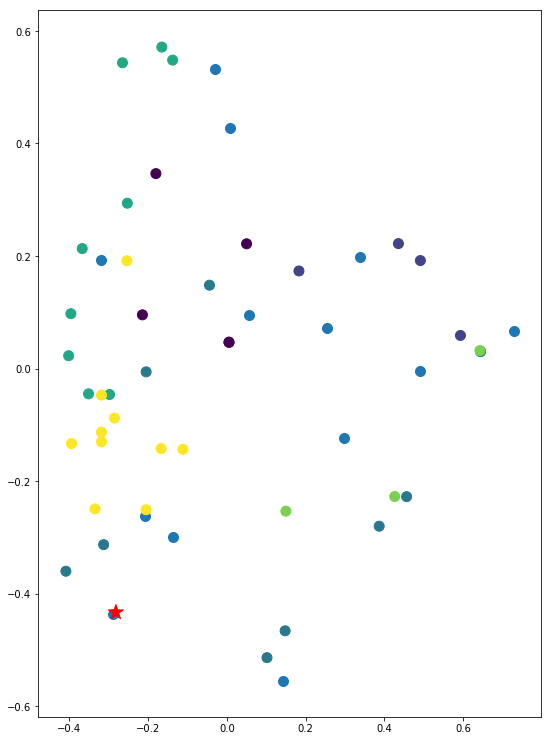

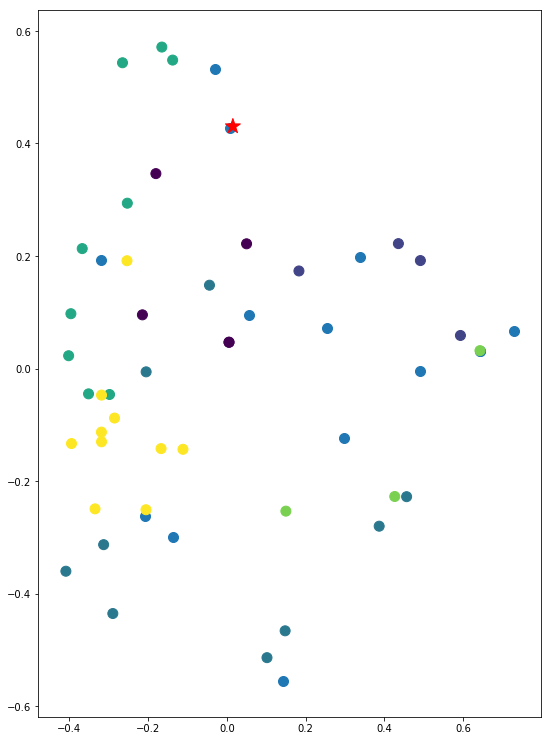

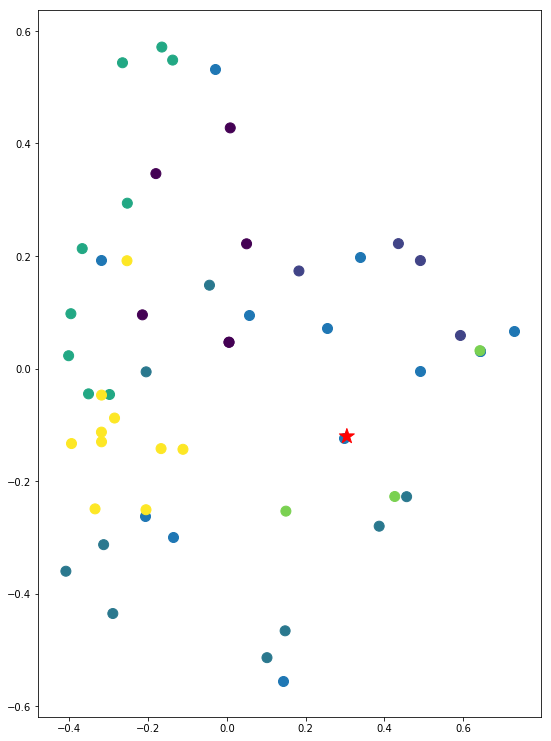

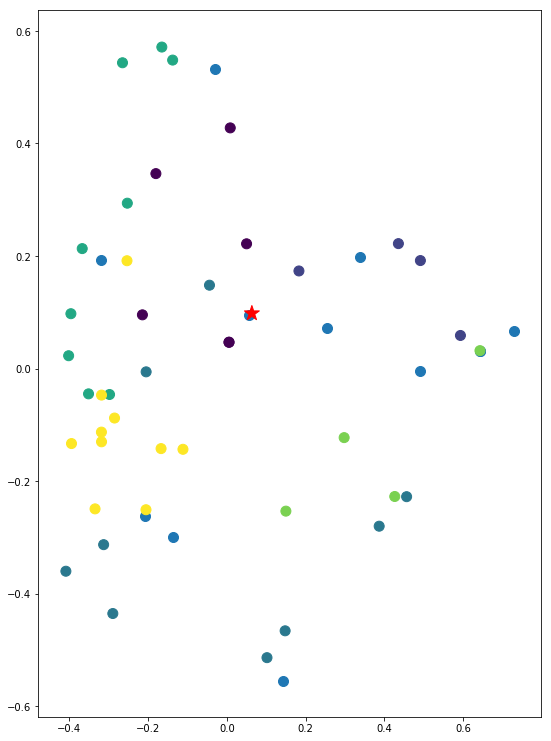

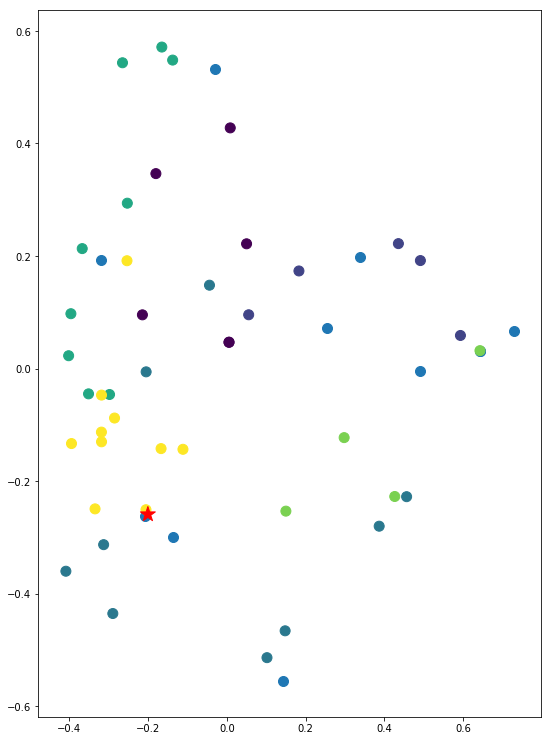

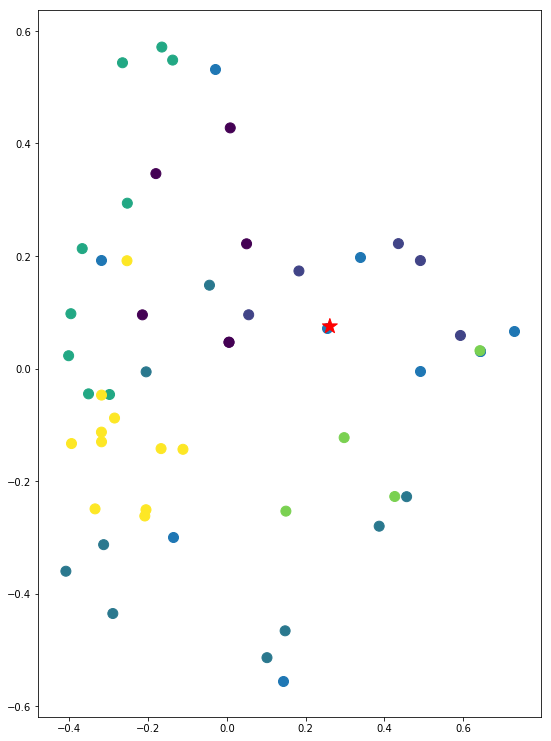

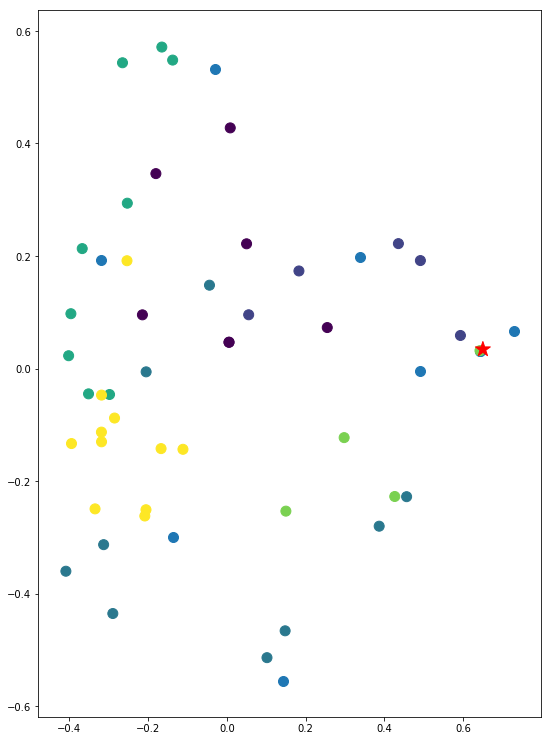

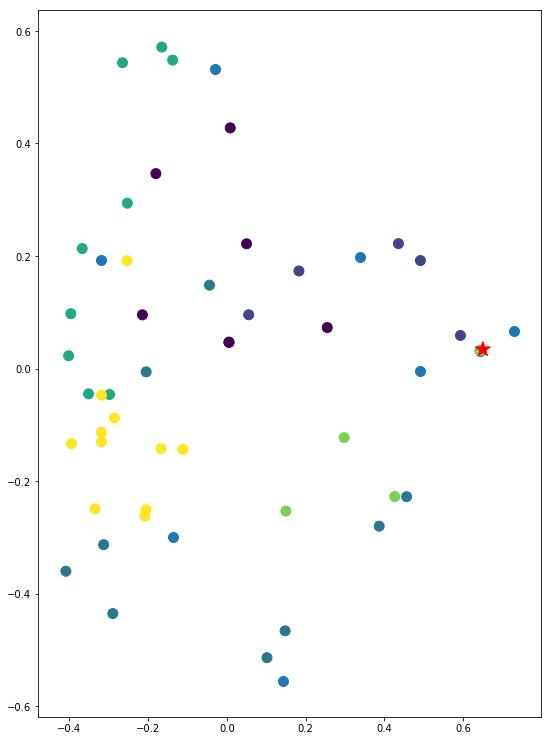

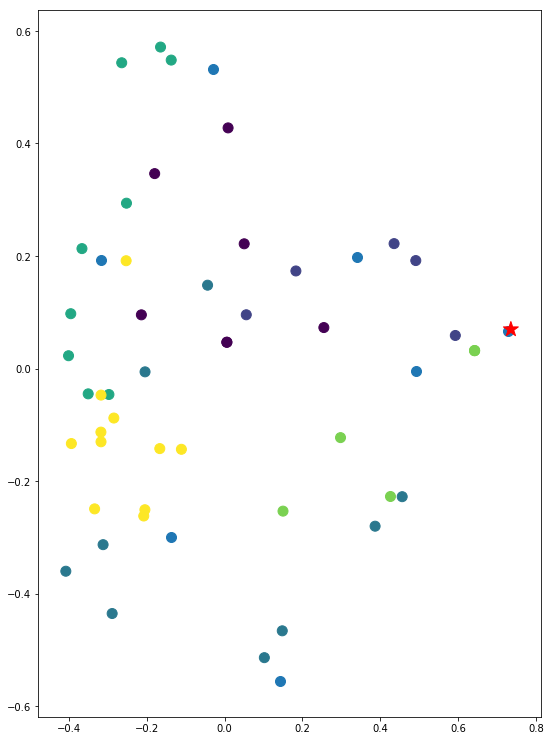

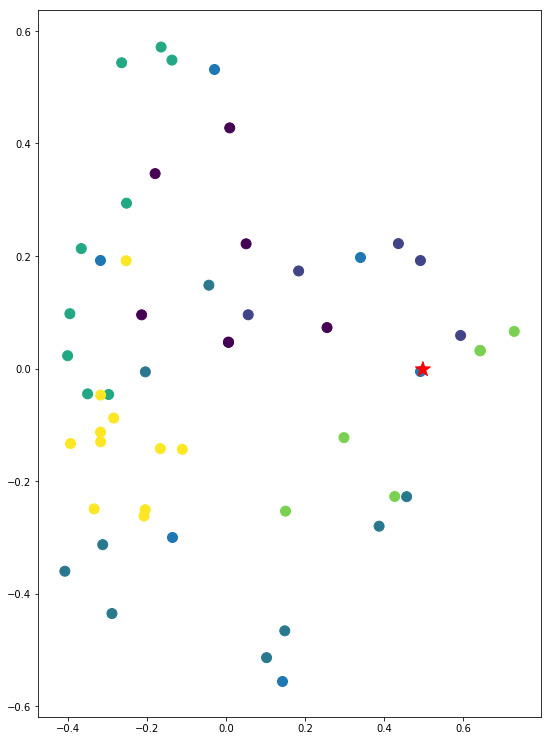

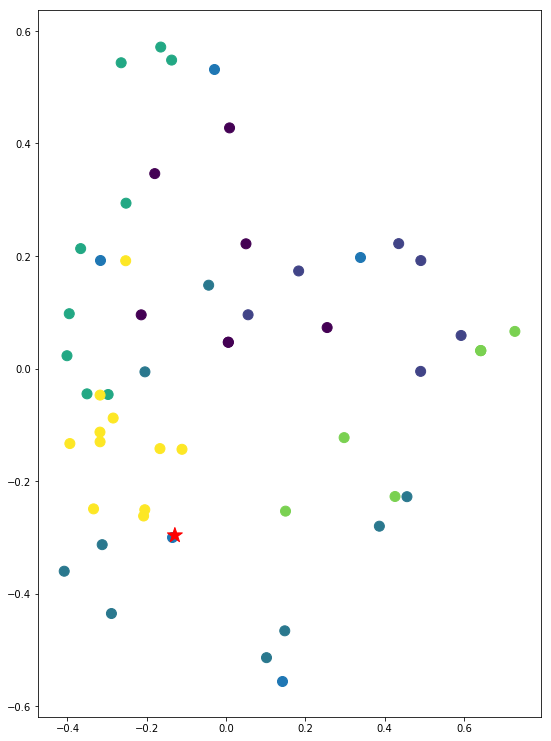

In [69]:
doc = PDFReport()
for i in range(50):
    # Plot sample
    sample_id = get_next_sample(X, Y, W, L)
    
    # Print question
    problem = "Cluster: " + str(y[sample_id] + 1) + "\n" + questions[sample_id]
    solution = solutions[sample_id]
    
    # Plot sample
    plt.figure(figsize=(9,13))
    
    # Get the total number of samples (nS) and total number of classes (nC). nC is not actually used.
    [nS, nC] = X.shape
    # Create the set of unlabelled samples (U)
    U = np.setdiff1d(np.arange(nS), L)
    
    # Plot unlabeled samples
    plt.scatter(x=sample[U,0], y=sample[U,1], s=100)
    
    # Color by class the ones already labeled
    if L:
        a = plt.scatter(x=sample[L,0], y=sample[L,1], c=y[L], s=100)
    
    # Star the queried sample
    plt.scatter(x=sample[sample_id,0], y=sample[sample_id,1], color='r', marker=r'$\star$', s=400)
    
    # Save figure
    plt.savefig("images/solution_%d.png" % sample_id)
#     print("Question %d" % sample_id)
    
    # Print question
#     problem = questions[sample_id]
#     solution = solutions[sample_id]
    
    # Suppose that the student gets it correctly
    # Update X matrix
    X[sample_id] = Y[sample_id]
    L.append(sample_id)
    doc.append_solution(sample_id, problem, solution)
#     print(X)

doc.generate_pdf("problems_1311")

### References
[1] Johns, E., Aodha, O. Mac & Brostow, G. J. Becoming the expert - Interactive multi-class machine teaching. in Proceedings of the IEEE Computer Society Conference on Computer Vision and Pattern Recognition (2015). doi:10.1109/CVPR.2015.7298877

[2] Zhu, X., Lafferty, J. & Ghahramani, Z. Combining Active Learning and Semi-Supervised Learning Using Gaussian Fields and Harmonic Functions Xiaojin. … Data Mach. Learn. … (2003).